## Interferensi Celah Ganda

Interferensi celah ganda selalu menarik dan menyenangkan untuk dibahas, karena melibatkan geometri dan superposisi gelombang, serta menghasilkan fenomena yang *indah*. Catatan ini adalah contoh untuk mensimulasikan eksperimen ini, termasuk membandingkannya dengan teori.

Prinsip-prinsip fisi utama yang berperan adalah:
1. **Prinsip Huygen**; setiap celah menjadi sumber gelombang yang baru.
1. **Superposisi gelombang**; pada setiap titik dalam ruang, terjadi efek gabungan dari dua gelombang tersebut, pengamatan akan dilakukan pada gabungan gelombang pada layar.
1. **Rerata waktu**: besaran yang teramati adalah *Intensitas*, yang diperoleh dengan merata-ratakan terhadap waktu besar medan (gabungan) kuadrat, dalam suatu rentang waktu tertentu.

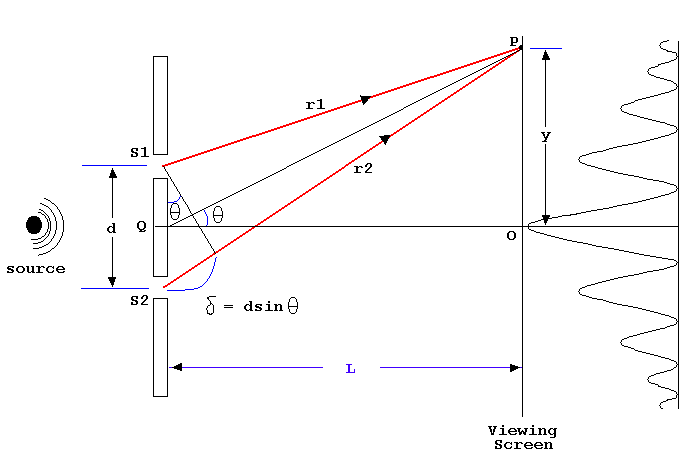



## Langkah-Langkah Simulasi

Kita mulai dengan mengimpor library yang dibutuhkan, dan mendefinisikan fungsi-fungsi untuk mendapatkan nilai medan listrik 

$$ E(r,t) = A \cos 2\pi(r/\lambda - f t + \phi) $$

dan intensitas

$$ I(r) = \frac{1}{T} \sum E^{2}(r,t) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def E_field(wvlngth, freq, phs, time, dist):
    return np.cos(2*np.pi*dist/wvlngth - 2*np.pi*freq*time + phs)

def Intensity(Et):
    # Et is the field as function of time at a fix position.
    return np.average(Et**2)

Berikutnya, nilai medan pada layar adalah penjumlahan gelombang dari kedua celah. Kedua gelombang tersebut akan memiliki perbedaan pada **jarak lintasan**, $\Delta r_1$ dan $\Delta r_2$, yaitu jarak antara posisi sumber $(x_{slit}, y_{slit-1})$, $(x_{slit}, y_{slit-2})$ dengan posisi pada layar $(x_{screen}, y_{screen})$. 

$$ \Delta r_i = \sqrt{(x_{screen} - x_{slit})^2 + (y_{screen} - y_{slit-i})^2} = \sqrt{L^2 + (y_{screen} - y_{slit-i})^2} $$

dimana $L$ adalah jarak celah ke layar ($L = x_{screen} - x_{slit}$). Sedangkan posisi vertikal pada celah ($y_{slit-1}$ dan $y_{slit-2}$) dapat ditentukan dari parameter jarak antar celah $d$. Yaitu:

$$ y_{slit-1}, y_{slit-2} = -d/2, +d/2 $$

Untuk ini, kita definisikan fungsi untuk menghitung jarak lintasan gelombang dari kedua celah:

In [2]:
def pathlength(d, L, y_screen):
    y_slit = np.array([-d/2, d/2])
    del_ri = np.sqrt(L**2 + (y_screen-y_slit)**2)
    return del_ri

Sekarang kita bisa menuliskan fungsi utama untuk menjalankan simulasi interferensi celah ganda ini. Parameter-parameter yang dibutuhkan adalah:

1. **Parameter gelombang**: karena kita mensimulasikan cahaya, kita cukup membutuhkan panjang gelombang $\lambda$. Dimana frekuensi akan diperoleh dari $f = c/\lambda$. Agar tidak terlalu rumit, tetapkan tidak ada fase awal gelombang ($\phi = 0$).
2. **Parameter geometri**: yaitu lebar celah $d$ dan jarang celah ke layar $L$.
3. **Parameter simulasi**: kita perlu menentukan posisi pada layar, dengan menetapkan jumlah titik $N_y$ dan posisi maksimum $y_{max}$, serta kita perlu menentukan rentang waktu untuk merata-rata intensitas, yaitu dengan menetapkan jumlah langkah waktu $N_{time}$ dan besar rentang waktu $\Delta t$.

jadi setidaknya ada tujuh parameter yang harus disediakan. Fungsi interferensi kita seperti ini:

In [3]:
def interference(d, L, wavelength, Ny, yMax, Nt, Dt):
    freq = 2.99e8/wavelength
    time_range = np.linspace(0,Dt,Nt+1)
    y_screens = yMax*np.linspace(-1,1,Ny+1)
    Iy = []
    for yi in y_screens:
        delR = pathlength(d, L, yi)
        E1 = E_field(wavelength, freq, 0, time_range, delR[0])
        E2 = E_field(wavelength, freq, 0, time_range, delR[1])
        Iy = np.append(Iy,Intensity(E1+E2))
    return y_screens, Iy

Nilai intensitas dapat ditampilkan sebagai grafik fungsi terhadap posisi layar, dilengkapi juga dengan *rendering greyscale* untuk menunjukkan pola terang gelap yang terbentuk. Kita buat fungsi untuk menampilkan grafik agar selanjutnya dapat dipanggil bila diperlukan.

In [4]:
def plot_simulation(y_screen, I_screen):
    fig, axs = plt.subplots(2, 1, figsize=(6, 4), gridspec_kw={'height_ratios':[3,2]})

    # --- Row 1: Intensity vs position ---
    axs[0].scatter(y_screen, I_screen, color='black', s=1)
    axs[0].set_xlim((y_screen).min(),(y_screen).max())
    axs[0].set_xlabel("Screen position")
    axs[0].set_ylabel("Intensity")
    axs[0].set_title("Interference Pattern")
    axs[0].grid(True)

    # --- Row 2: Rendered grayscale light ---
    i_norm = I_screen/np.max(I_screen)
    screen = np.tile(i_norm, (100,1))
    axs[1].imshow(screen, cmap='grey', aspect='auto',
              extent=[(y_screen).min(), (y_screen).max(), 0, 1])
    axs[1].set_title("Rendered Screen (Grayscale)")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

Kita coba jalankan dengan memberikan parameter-parameter yang dibutuhkan:

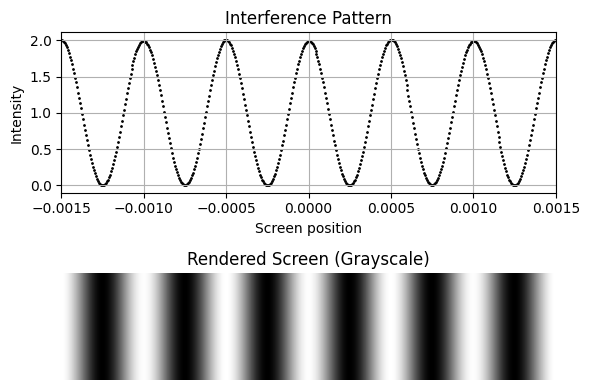

In [5]:
wavelength = 500e-9
d_slit = 1e-3 # distance between adjacent slits
L_sc  = 1.0 # distance from slit to screen
N_ysc = 500 # number of positions on screen to be evaluated
y_screen_max = 1.5e-3
N_time = 200
t_range = 2.*wavelength/(2.99e8) # time range is two Periods.

y_screen, I_screen = interference(d_slit, L_sc, wavelength, N_ysc, y_screen_max, N_time, t_range)
plot_simulation(y_screen, I_screen)

### Perhitungan Teoritis

Simulasi numerik di atas (seharusnya) sudah berjalan baik dan kita dapat melihat tampilan hasilnya. Kita lengkapi dengan perhitungan pola intensitas berdasarkan teori. Fungsi intensitas dapat ditemukan di buku-buku referensi ataupun berdasarkan penjelasan yang diberikan di kelas. Agar mudah dibandingkan dengan simulasi, kita gunakan bentuk intensitas sebagai fungsi dari posisi layar $y$. Yaitu:

$$ I = 4I_0 \cos^2 \left[\frac{\pi d y}{\lambda L} \right]$$

Pola terang ditemukan pada posisi-posisi yang memenuhi

$$ y = \left(\frac{L}{d}\right) m\lambda $$

Agar lebih mudah memverifikasi posisi-posisi pola terang (dan gelap), dalam membuat plot kita *scaling* nilai posisi dengan

$$ y_{new} = \frac{y}{\frac{L\lambda}{d}} $$

Berikut fungsi untuk menghitung nilai teoritis untuk intensitas, dan fungsi plot gabungan hasil simulasi dan teori.

In [6]:
def interference_theory(d, L, wavelength, Ny, yMax):
    y_screens = yMax*np.linspace(-1,1,Ny+1)
    I_theory = 4*(0.5)*(np.cos(np.pi*d*y_screens/(wavelength*L))**2)
    return I_theory

def plot_sim_theory(d, L, wavelength, y_screen, I_screen, I_theory):
    fig, axs = plt.subplots(2, 1, figsize=(6, 4), gridspec_kw={'height_ratios':[3,2]})
    y_scale = y_screen/(L*wavelength/d)
    # --- Row 1: Intensity vs position ---
    axs[0].plot(y_scale, I_theory, color='red', linewidth=0.6)
    axs[0].scatter(y_scale, I_screen, color='black', s=1)
    axs[0].set_xlim((y_scale).min(),(y_scale).max())
    axs[0].set_xlabel("Screen position/$(L\\lambda/d)$")
    axs[0].set_ylabel("Intensity")
    axs[0].set_title("Interference Pattern")
    axs[0].grid(True)

    # --- Row 2: Rendered grayscale light ---
    i_norm = I_screen/np.max(I_screen)
    screen = np.tile(i_norm, (100,1))
    axs[1].imshow(screen, cmap='grey', aspect='auto',
              extent=[(y_scale).min(), (y_scale).max(), 0, 1])
    axs[1].set_title("Rendered Screen (Grayscale)")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

kita coba eksekusi.

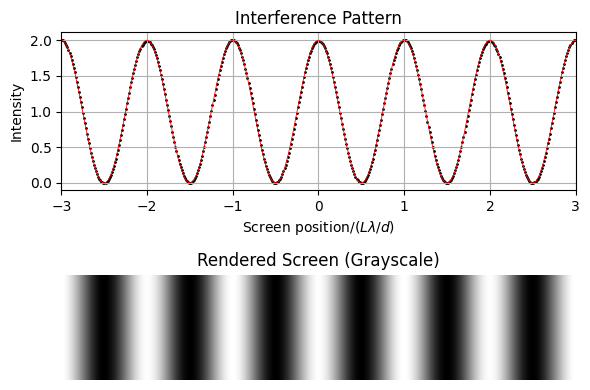

In [7]:
wavelength = 500e-9
d_slit = 1e-3 # distance between adjacent slits
L_sc  = 1 # distance from slit to screen
N_ysc = 500 # number of positions on screen to be evaluated
y_screen_max = 1.5e-3
N_time = 200
t_range = 2.*wavelength/(2.99e8) # time range is two Periods.

y_screen, I_screen = interference(d_slit, L_sc, wavelength, N_ysc, y_screen_max, N_time, t_range)
I_theory = interference_theory(d_slit, L_sc, wavelength, N_ysc, y_screen_max)
plot_sim_theory(d_slit, L_sc, wavelength, y_screen, I_screen, I_theory)

So far so good.
Program simulasi dan perhitungan teoritis telah bekerja. Selanjutnya kita dapat ekplorasi lebih lanjut dengan memvariasikan parameter-parameter yang ada. 

Beberapa hal yang bisa diselidiki:
1. seberapa dekat posisi layar hingga pendekatan teoritis masih bisa digunakan,
2. bagaimana pengaruh lebar celah, panjang gelombang
3. berapa nilai parameter simulasi yang efektif
4. dst...

di bawah ini contoh melihat hasil teoritis dengan konfigurasi posisi layar yang sangat dekat, tampak mulai terjadi ketidaksesuaian simulasi dan teori.

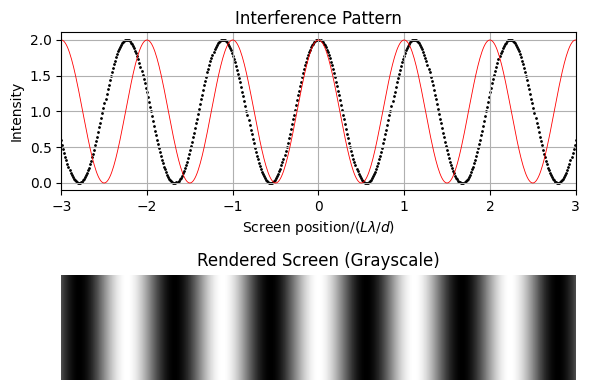

In [8]:
wavelength = 500e-9
d_slit = 1e-3 # distance between adjacent slits
L_sc  = 0.001 # distance from slit to screen
N_ysc = 500 # number of positions on screen to be evaluated
y_screen_max = 1.5e-6
N_time = 200
t_range = 2.*wavelength/(2.99e8) # time range is two Periods.

y_screen, I_screen = interference(d_slit, L_sc, wavelength, N_ysc, y_screen_max, N_time, t_range)
I_theory = interference_theory(d_slit, L_sc, wavelength, N_ysc, y_screen_max)
plot_sim_theory(d_slit, L_sc, wavelength, y_screen, I_screen, I_theory)

Demikian catatan untuk interferensi. Seharusnya selanjutnya ada catatan tentang Difraksi, semoga ada.